MNIST TRAINING DATASET

In [1]:
import torch
import torch.cuda
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
print(torch.version.cuda)

11.8


Initialize before every new learning


cuda
device


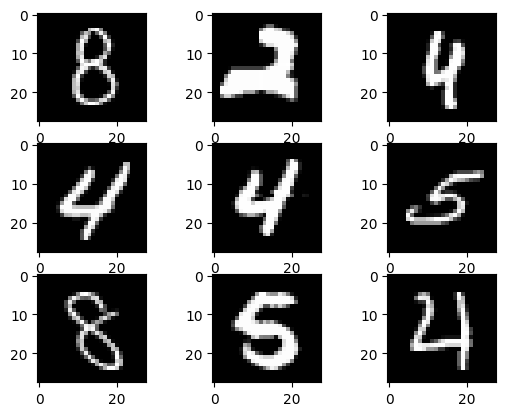

In [3]:
device = torch.device('cuda' if torch.cuda.is_available()else 'cpu')
print(device)
print(torch.device.__name__)

#hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.01

#MNIST
train_dataset = torchvision.datasets.MNIST(root='../myneuralnetworks/datasets',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='../myneuralnetworks/datasets',train=False,transform=transforms.ToTensor())

#train loader 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

#test loader
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

#examples
examples = iter(train_loader)
samples,labels = next(examples)
# print(samples,labels)
# print(samples.shape,labels.shape)
for i in range(9):
    plt.subplot(3,3,i+1) #3 rows 3 columns and i is index of the subplot
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

Creating a model with different linearities

In [ ]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid =nn.Sigmoid()

        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        # out =self.tanh(out)
        # out =self.sigmoid(out)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

training a model with different optimizers

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer2 = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss =nn.CrossEntropyLoss()
totalsteps=len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        #forward pass
        output=model(images)
        l = loss(output,labels)
        #backward pass
        optimizer.zero_grad()
        l.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5, 2.0)
        optimizer.step()
        if(epoch%5==0):
            learning_rate =learning_rate*0.1
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            
        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{totalsteps}, loss={l.item():.4f}')

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer2 = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss =nn.CrossEntropyLoss()
totalsteps=len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        #forward pass
        output=model(images)
        l = loss(output,labels)
        #backward pass
        optimizer2.zero_grad()
        l.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5, 2.0)
        optimizer2.step()
        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{totalsteps}, loss={l.item():.4f}')

Test the model


In [ ]:
with torch.no_grad():
    correct=0;
    examples =len(test_loader.dataset)
    for images,labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        output = model(images)
    
     # max returns (output_value ,index)
        _, predicted = torch.max(output, 1)
        correct += (predicted == labels).sum().item()

    acc = correct / examples
    print(f'Accuracy of the network on the {examples} test images: {100*acc} %')

CNN


In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.get_device_name())

NVIDIA GeForce MX150


In [81]:
#HyperParameters
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.01

In [82]:
#transform image to tensor
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
#MNIST
train_dataset = torchvision.datasets.MNIST(root='../myneuralnetworks/datasets',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='../myneuralnetworks/datasets',train=False,transform=transforms.ToTensor())

#train loader 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

#test loader
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [83]:
print(train_loader)
dataiter= iter(train_loader)
images,labels = next(dataiter)
# print(images.shape)
# print(images[1])

In [84]:
class convolutionalNet(nn.Module):
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.maxpool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu =nn.ReLU()

    def forward(self, x):
        x= self.conv1(x) # N 28,24,24
        x= self.relu(x) 
        x= self.maxpool(x) # N 28, 12,12 
        x= self.conv2(x)
        x= self.relu(x)
        x= self.maxpool(x)
        x= x.view(-1,16*4*4)
        x= self.fc1(x)
        x= self.relu(x)
        x= self.fc2(x)
        x= self.relu(x)
        x= self.fc3(x)
        return x

In [87]:
for name,param in model.named_parameters():
    print(name)
    print(param)

conv1.weight
Parameter containing:
tensor([[[[ 0.0829, -0.1036, -0.3052, -0.5707, -0.3004],
          [-0.2435,  0.0044,  0.2659, -0.4390, -1.0221],
          [-0.0650,  0.3002,  0.9762,  0.5781, -0.2031],
          [-0.2079, -0.4764,  0.3041,  0.1879, -0.1927],
          [-0.4431, -0.2428, -0.1558,  0.3696,  0.0712]]],


        [[[ 0.1078,  0.1490,  0.5940,  0.3468,  0.3099],
          [-0.1155,  0.1904, -0.0660, -0.2478, -0.6830],
          [ 0.4485,  0.3503, -0.2724, -1.1439, -0.6110],
          [-0.0484,  0.1982, -0.5636, -1.5694, -0.2568],
          [-0.0787, -0.2571, -0.2860, -0.8013, -0.2909]]],


        [[[ 0.2543, -0.0773, -1.2183, -0.2073,  0.2095],
          [-0.2401, -1.1922, -0.5605,  0.4278,  0.4278],
          [-0.5741, -0.2549,  0.2302,  0.0126,  0.2093],
          [-0.3954, -0.1653,  0.1852, -0.0559,  0.2463],
          [-0.4270,  0.0533,  0.0108,  0.1796,  0.4499]]],


        [[[-0.5887, -0.5128,  0.3931,  0.6842,  0.0843],
          [-0.7297, -1.0207, -2.4910, -1.

In [85]:
#training the network
model = convolutionalNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=l1_lambda)
totalsteps=len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        #forward pass
        output=model(images)
        l = criterion(output,labels)
        #backward pass
        optimizer.zero_grad()
        l.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5, 2.0)
        optimizer.step()
        if (i+1)%100==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{totalsteps}, loss={l.item():.4f}')


epoch 1/10, step 100/600, loss=0.2338
epoch 1/10, step 200/600, loss=0.1110
epoch 1/10, step 300/600, loss=0.0607
epoch 1/10, step 400/600, loss=0.0770
epoch 1/10, step 500/600, loss=0.0279
epoch 1/10, step 600/600, loss=0.0986
epoch 2/10, step 100/600, loss=0.0542
epoch 2/10, step 200/600, loss=0.0751
epoch 2/10, step 300/600, loss=0.0742
epoch 2/10, step 400/600, loss=0.0210
epoch 2/10, step 500/600, loss=0.0471
epoch 2/10, step 600/600, loss=0.0348
epoch 3/10, step 100/600, loss=0.0730
epoch 3/10, step 200/600, loss=0.0823
epoch 3/10, step 300/600, loss=0.0401
epoch 3/10, step 400/600, loss=0.0233
epoch 3/10, step 500/600, loss=0.0281
epoch 3/10, step 600/600, loss=0.0828
epoch 4/10, step 100/600, loss=0.0737
epoch 4/10, step 200/600, loss=0.0526
epoch 4/10, step 300/600, loss=0.0045
epoch 4/10, step 400/600, loss=0.0358
epoch 4/10, step 500/600, loss=0.0961
epoch 4/10, step 600/600, loss=0.0045
epoch 5/10, step 100/600, loss=0.0185
epoch 5/10, step 200/600, loss=0.0124
epoch 5/10, 

In [88]:
#testing
with torch.no_grad():
    correct=0;
    examples =len(test_loader.dataset)
    for images,labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)
    
     # max returns (output_value ,index)
        _, predicted = torch.max(output, 1)
        correct += (predicted == labels).sum().item()

    acc = correct / examples
    print(f'Accuracy of the network on the {examples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 97.92 %
